<h1>SJU - DSS 740 - Machine Learning (Spring 2025)</h1>
<h2 style = 'color:yellow'>4. Unsupervised Learning</h2>
<h3 style = 'color:green'>4.0 Import Libraries</h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', FutureWarning)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import inspect  # For inspecting Python objects
from sklearn import datasets # https://scikit-learn.org/stable/datasets/toy_dataset.html
from IPython.display import display, HTML, Image

# Scikit-Learn imports various unsupervised learning algorithms.
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [4]:
%matplotlib inline

In [5]:
# Sklearn's built-in dataset has several datasets.
all_datasets = inspect.getmembers(datasets, inspect.isfunction)

print("Available datasets in scikit-learn:")
for name, func in all_datasets:
  if name.startswith('load'):
    print(f"- {name}")

Available datasets in scikit-learn:
- load_breast_cancer
- load_diabetes
- load_digits
- load_files
- load_iris
- load_linnerud
- load_sample_image
- load_sample_images
- load_svmlight_file
- load_svmlight_files
- load_wine


<h3 style = 'color:green'>4.1 Load and Explore Data</h3>

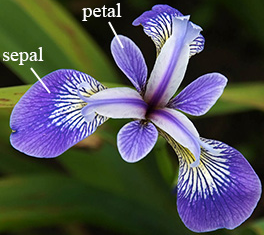

In [6]:
Image("../../Images/IRIS.png")

In [7]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target

print('Number of samples:', X.shape[0])
X[:5]

Number of samples: 150


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
# Let's add column names to the dataset
X = pd.DataFrame(X, columns=iris_dataset.feature_names)
y = pd.Series(y, name='target')

In [9]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df_iris = pd.concat([X, y], axis=1)
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


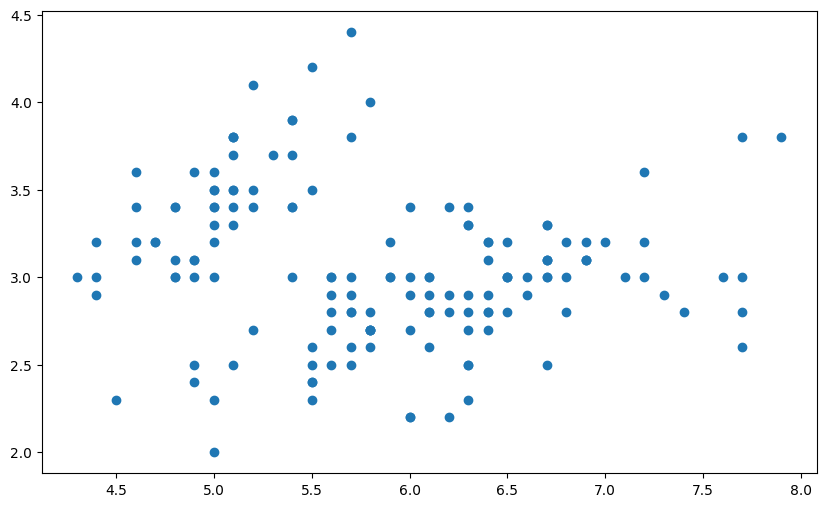

In [14]:
# Let's assume we know nothing about the dataset. We can visualize the first two features as a 2D scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1])
plt.show()

<Figure size 1000x600 with 0 Axes>

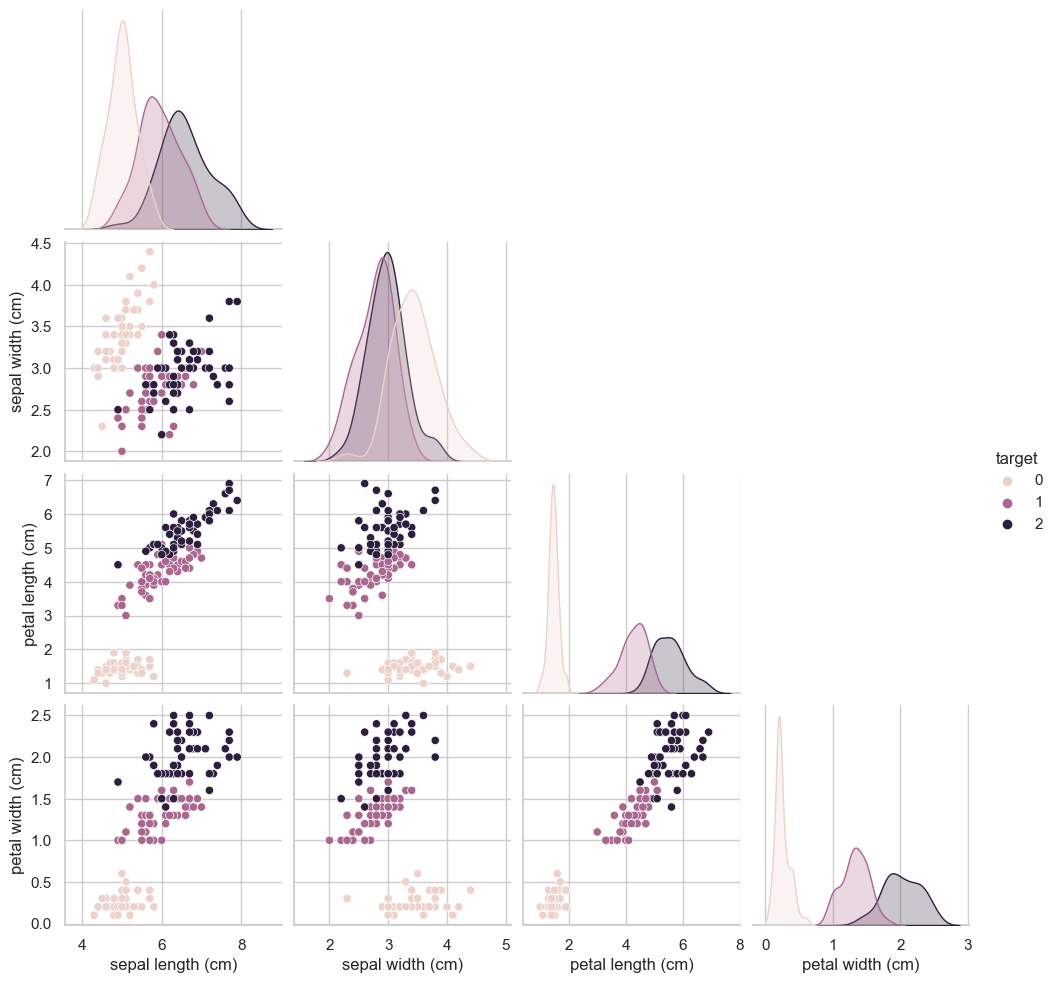

In [15]:
# Let's visualize the data using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.pairplot(df_iris, hue="target", corner=True)
plt.show();

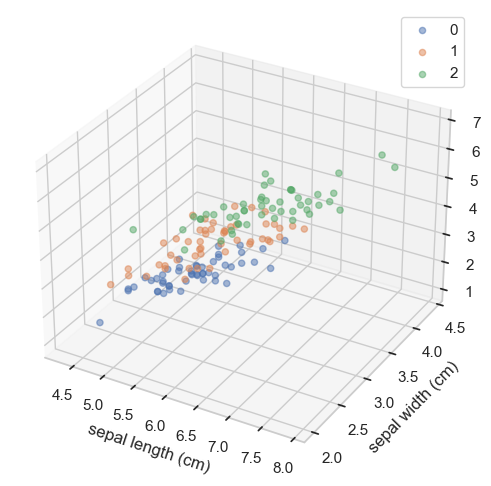

In [16]:
# Since we have three classes, we can visualize the data in 3D.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib import style

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(iris_dataset.feature_names[0])
ax.set_ylabel(iris_dataset.feature_names[1])
ax.set_zlabel(iris_dataset.feature_names[2])

for name, group in df_iris.groupby('target'):
    ax.scatter(group.iloc[:, 0], group.iloc[:, 1], group.iloc[:, 2], label=name, alpha=0.5)
    ax.legend()
plt.show()

In [17]:
# We can use Plotly for interactive 3D plots.
import plotly.express as px
import pandas as pd

iris = datasets.load_iris(as_frame=True)
df_iris = iris.frame

fig = px.scatter_3d(df_iris,
                    x=iris.feature_names[0],
                    y=iris.feature_names[1],
                    z=iris.feature_names[2],
                    color='target',
                    category_orders={'target': sorted(df_iris['target'].unique())}) # Ensure consistent color mapping
fig.show()

<h3 style = 'color:green'>4.2 Build K-Means Model</h3>

<b>Elbow Method:</b> The Elbow Method is a popular method for determining the optimal number of clusters in a dataset. It involves plotting the explained variation as a function of the number of clusters. The explained variation is calculated as the average distance between a data point and all other points in the same cluster. The goal is to minimize this value.<br>
<b>Silhoutte Score:</b> The Silhouette Score measures how well each data point fits within its cluster — and how distinct that cluster is from others.

<h4 style = 'color:lightgreen'>4.2.1 K-Means: Base Model</h4>

The <code>K-Means</code> algorithm is a simple yet popular unsupervised machine learning algorithm used for clustering. It aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. We can influence the behavior of the model by changing the following hyperparameters:

<ol>
    <li><b><code>n_clusters</code></b>: <i>k</i> clusters</li>
    <li><b><code>max_iter</code></b>: Maximum number of iterations</li>
    <li><b><code>tol</code></b>: Tolerance to declare convergence</li>
    <li><b><code>random_state</code></b>: Random number generator seed</li>
</ol>

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print("Cluster centers:\n", cluster_centers)

Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


<table>
    <tr>
        <th>Feature</th>
        <th>Cluster 0</th>
        <th>Cluster 1</th>
        <th>Cluster 2</th>
    </tr>
    <tr>
        <td>Sepal Length</td>
        <td>6.85</td>
        <td>5.00</td>
        <td>5.88</td>        
    </tr>
    <tr>
        <td>Sepal Width</td>
        <td>3.08</td>
        <td>3.43</td>
        <td>2.74</td>        
    </tr>
    <tr>
        <td>Petal Length</td>
        <td>5.72</td>
        <td>1.46</td>
        <td>4.39</td>        
    </tr>
    <tr>
        <td>Petal Width</td>
        <td>2.05</td>
        <td>0.25</td>
        <td>1.43</td>        
    </tr>            
</table>

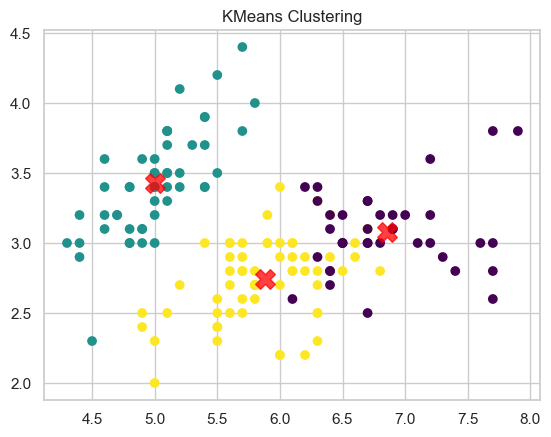

In [19]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.show()

<h4 style = 'color:lightgreen'>4.2.2 K-Means: Choosing 'K'</h4>

k = 2, SSE = 152.35, Silhouette Score = 0.68
k = 3, SSE = 78.86, Silhouette Score = 0.55
k = 4, SSE = 57.35, Silhouette Score = 0.50
k = 5, SSE = 46.47, Silhouette Score = 0.49
k = 6, SSE = 39.07, Silhouette Score = 0.37
k = 7, SSE = 34.31, Silhouette Score = 0.35
k = 8, SSE = 30.48, Silhouette Score = 0.34
k = 9, SSE = 29.91, Silhouette Score = 0.32
k = 10, SSE = 28.55, Silhouette Score = 0.30


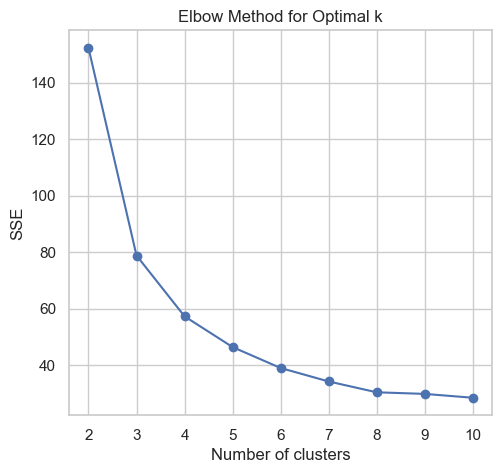

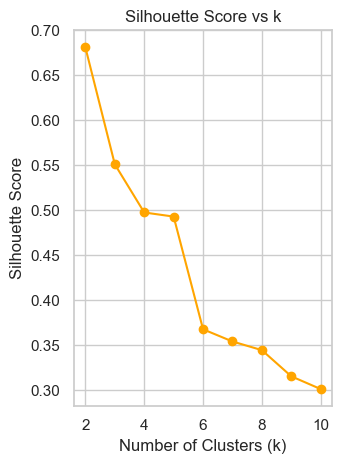


✅ Best k (based on highest silhouette score): 2


In [20]:
list_of_k = range(2, 11)
error_list = [0] * len(list_of_k)
silhouette_scores = []

for idx, k in enumerate(list_of_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(cluster_labels == i)[0] # Get the indices of the samples in cluster i
        sse += np.sum((X.iloc[cluster_i].values - centroids[i]) ** 2) # Sum of squared errors

    # Calculate the silhouette score for the current k
    error_list[idx] = sse
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'k = {k}, SSE = {sse:.2f}, Silhouette Score = {silhouette_avg:.2f}')

# Plotting the SSE for different values of k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list_of_k, error_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Plotting the silhouette scores for different values of k
plt.subplot(1, 2, 2)
plt.plot(list_of_k, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# STEP 4: Auto-detect best k
best_k = list_of_k[np.argmax(silhouette_scores)]
print(f"\n✅ Best k (based on highest silhouette score): {best_k}")

<h4 style = 'color:lightgreen'>4.2.3 K-Means: Choosing 'K' (Scaled)</h4>

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 2, SSE = 222.36, Silhouette Score = 0.58
k = 3, SSE = 191.02, Silhouette Score = 0.48
k = 4, SSE = 114.35, Silhouette Score = 0.39
k = 5, SSE = 91.05, Silhouette Score = 0.35
k = 6, SSE = 81.55, Silhouette Score = 0.33
k = 7, SSE = 80.78, Silhouette Score = 0.27
k = 8, SSE = 64.43, Silhouette Score = 0.34
k = 9, SSE = 55.71, Silhouette Score = 0.32
k = 10, SSE = 51.12, Silhouette Score = 0.34


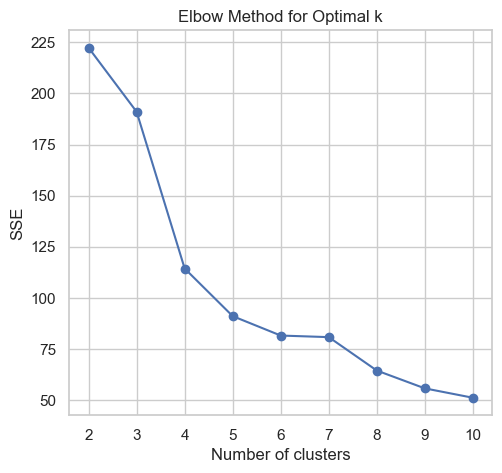

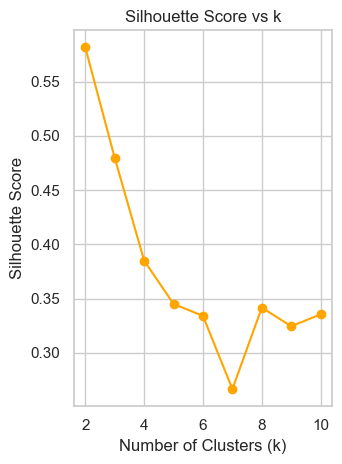


✅ Best k (based on highest silhouette score): 2


In [22]:
list_of_k = range(2, 11)
error_list = [0] * len(list_of_k)
silhouette_scores = []

for idx, k in enumerate(list_of_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(cluster_labels == i)[0] # Get the indices of the samples in cluster i
        sse += np.sum((X_scaled[cluster_i] - centroids[i]) ** 2) # Sum of squared errors

    # Calculate the silhouette score for the current k
    error_list[idx] = sse
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'k = {k}, SSE = {sse:.2f}, Silhouette Score = {silhouette_avg:.2f}')

# Plotting the SSE for different values of k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list_of_k, error_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Plotting the silhouette scores for different values of k
plt.subplot(1, 2, 2)
plt.plot(list_of_k, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# STEP 4: Auto-detect best k
best_k = list_of_k[np.argmax(silhouette_scores)]
print(f"\n✅ Best k (based on highest silhouette score): {best_k}")

In [23]:
df_iris_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_iris_scaled['target'] = df_iris['target']
df_iris_scaled.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [24]:
fig = px.scatter_3d(df_iris_scaled,
                    x=iris.feature_names[0],
                    y=iris.feature_names[1],
                    z=iris.feature_names[2],
                    color='target', # Use the scaled data for clustering
                    size = 'target', # Just for visualization, not meaningful
                    hover_name='target',
                    title="Iris Dataset Clustering (Scaled Data)",
                    category_orders={'target': sorted(df_iris['target'].unique())}) # Ensure consistent color mapping
fig.show()

In [25]:
# Choose number of clusters
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Get silhouette values for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
avg_silhouette = silhouette_score(X_scaled, cluster_labels)

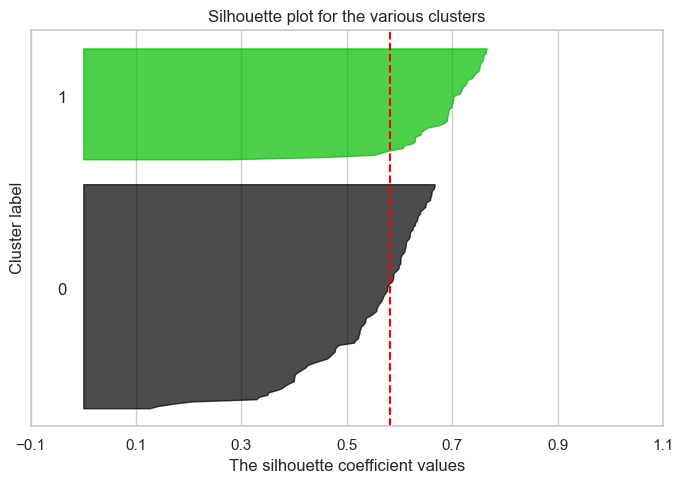

In [26]:
# Create silhouette plot
fig, ax = plt.subplots(figsize=(7, 5))

y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Space between clusters

# Red line for average silhouette score
ax.axvline(x=avg_silhouette, color="red", linestyle="--")

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.tight_layout()
plt.show()

<h3 style = 'color:green'>4.3 DBSCAN Model</h3>

<b>DBSCAN Algorithm:</b>
<ol>
    <li>Select epsilon <code>ϵ</code> and minimum <code>neighbor</code> to form a dense region.</li>
    <li>Start with an <u>unvisited</u> point, arbitrarily picked.</li>
    <li>Retrieve all points with the ϵ-neighborhood of the chosen point.</li>
    <ol>
        <li>If the number of neighbors (including the point itself) is greater than or equal to <code>neighbors</code>, maek the current point as a core point and create a new cluster. Add all of the neighbors to this cluster.</li>
        <li>If the number of neighbors is less than <code>neighbors</code>, mark the current point as a border point.</li>
        <li>If the point has fewer than <code>neighbors</code> and is not within the ϵ-neighborhood of any other core point, mark it as a noise.</li>
    </ol>
    <li>Expand the cluster by visiting all neighbors recursively of each core point in the newly formed cluster. If these neighbors are also core points, add their ϵ-neighborhood to the cluster. Border points reachable from core points are also added to the cluster.</li>
</ol>

<h4 style = 'color:lightgreen'>4.3.1 Choosing Epsilon</h4>

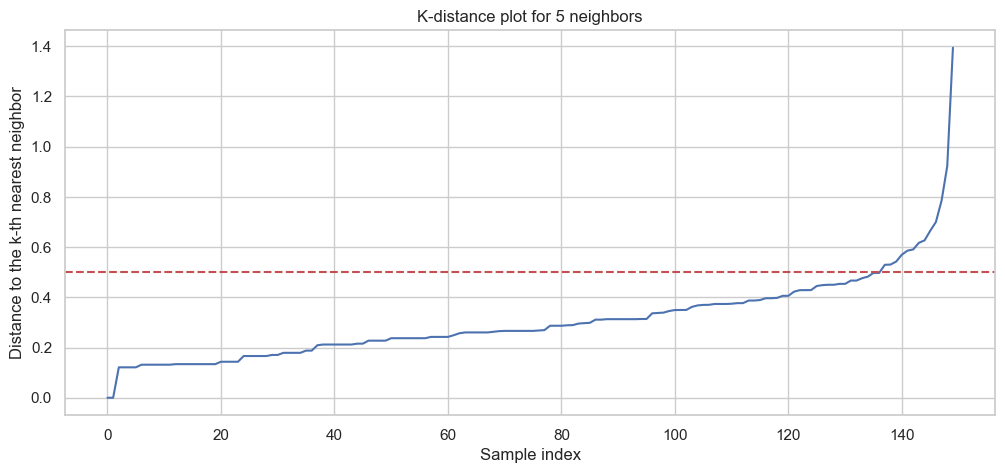

In [27]:
# Use K-distance plot to find optimal epsilon
neighbors = 5
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled) # Get distances to k-nearest neighbors and indices. These distances represent the distance from each sample to its k-nearest neighbors.
fifth_nn_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(12, 5))
plt.plot(fifth_nn_distances, label=f"{k}th nearest neighbor")
plt.title(f"K-distance plot for {neighbors} neighbors")
plt.xlabel("Sample index")
plt.ylabel("Distance to the k-th nearest neighbor")
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label='Epsilon threshold')
plt.show()

In [28]:
# Convert to DataFrame for heatmap visualization
dist_df = pd.DataFrame(distances, columns=[f"{i+1}th NN" for i in range(neighbors)])

# Plot a heatmap of the distances
fig = px.imshow(dist_df.iloc[:20].values,
                labels=dict(x="Neighbor Rank", y="Sample Index", color="Distance"),
                x=dist_df.columns.tolist(),
                y=list(range(20)),
                text_auto=".2f",
                color_continuous_scale='Viridis',
                zmax=1.0)

fig.update_layout(title="Interactive Heatmap of Distances to k Nearest Neighbors")
fig.show()

In [34]:
distances[:, 4]

array([0.23710977, 0.23710977, 0.31104122, 0.28389113, 0.29154628,
       0.46408451, 0.49719351, 0.24891184, 0.55247084, 0.27119749,
       0.44994717, 0.35304268, 0.28851266, 0.50684599, 0.66179109,
       1.21236159, 0.53245469, 0.27119749, 0.56404433, 0.35922722,
       0.35304268, 0.35781942, 0.57818549, 0.47101572, 0.39637   ,
       0.29828781, 0.31292365, 0.26013882, 0.26013882, 0.2662756 ,
       0.26013882, 0.42547067, 0.71564945, 0.75108937, 0.2662756 ,
       0.36792033, 0.43399991, 0.42547067, 0.46039353, 0.26013882,
       0.28851266, 1.62127903, 0.4015088 , 0.49719351, 0.44502517,
       0.2970349 , 0.35430096, 0.24891184, 0.35922722, 0.33424117,
       0.68988629, 0.53967244, 0.42925026, 0.54697576, 0.40749818,
       0.44866133, 0.66380537, 0.79159893, 0.37678398, 0.67102971,
       1.10806684, 0.42547067, 0.77979354, 0.34971228, 0.44866133,
       0.45352282, 0.40749818, 0.46679802, 0.75674615, 0.36369587,
       0.57011089, 0.46281731, 0.60655213, 0.48635117, 0.40749

<h4 style = 'color:lightgreen'>4.3.2 Training the DBSCAN model and Visualizing Output</h4>

In [29]:
# Let's build the model with epsilon=0.5 and min_samples=5.
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [30]:
# Unique cluster labels
unique_labels = set(labels)

# Count clusters (excluding noise)
# In the fit_predict method, -1 is used to label noise points, whereas other labels are used for clusters. 
n_clusters = len(unique_labels) - (1 if -1 in labels else 0) # Subtrating 1 allows us to exclude noise points from the count.
n_noise = list(labels).count(-1) # Count noise points

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Estimated number of clusters: 2
Number of noise points: 34


In [31]:
print(f"We can see {n_clusters} clusters and {n_noise} noise points in the dataset.")

We can see 2 clusters and 34 noise points in the dataset.


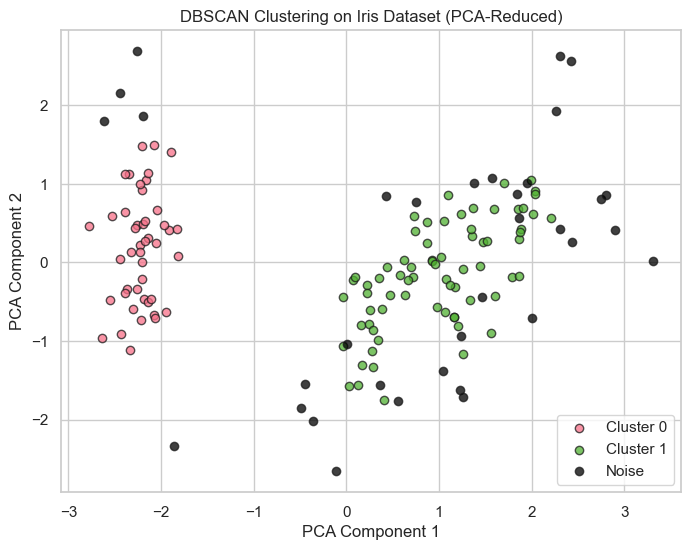

In [32]:
# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
palette = sns.color_palette("husl", len(unique_labels))
for label in unique_labels:
    color = 'black' if label == -1 else palette[label]
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(
        X_pca[labels == label, 0],
        X_pca[labels == label, 1],
        label=label_name,
        c=[color],
        edgecolor='k',
        alpha=0.75
    )

plt.title("DBSCAN Clustering on Iris Dataset (PCA-Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


<b>Silhouttte Score:</b>

It computes the average silhouette score over all samples. The silhouette score ranges from -1 to +1.

<ul>
    <li><b>Close to 1</b>: Well-clustered</li>
    <li><b>Near 0</b>: Overlapping clusters</li>
    <li><b>Negative</b>: Misclassified points</li>
</ul>

<b>Cohesion:</b> How close a point is to others in the same cluster<br>
<b>Separation:</b> How far a point is from points in the nearest other cluster

In [33]:
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score not defined for less than 2 clusters.")

Silhouette Score: 0.3565


<!DOCTYPE html>
<html>
<head>
<title>Clustering Interpretation</title>
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    font-family: sans-serif;
  }
  th, td {
    border-bottom: 1px solid #ddd;
    padding: 8px;
    text-align: left;
  }
  th {
    font-weight: bold;
  }
  tr:last-child td {
    border-bottom: none;
  }
  .cluster-label {
    font-weight: bold;
  }
  .interpretation-text {
    white-space: nowrap; /* Prevent text wrapping for better alignment */
  }
  .emoji {
    margin-right: 5px;
  }
  .score {
    font-style: italic;
    color: #555;
  }
</style>
</head>
<body>

<table>
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><span class="cluster-label">Cluster 1</span></td>
      <td><span class="emoji">👍</span><span class="interpretation-text">Strong separation, likely <strong>Setosa</strong></span></td>
    </tr>
    <tr>
      <td><span class="cluster-label">Cluster 0</span></td>
      <td><span class="emoji">🤔</span><span class="interpretation-text">Moderate, fuzzy boundaries</span></td>
    </tr>
    <tr>
      <td><span class="cluster-label">Noise</span></td>
      <td><span class="emoji">❌</span><span class="interpretation-text">Outliers or misfits — not close to any dense region</span></td>
    </tr>
    <tr>
      <td><span class="cluster-label">Overall Score</span></td>
      <td><span class="emoji">📈</span><span class="interpretation-text">Not bad (<span class="score">0.3565</span>), given the nature of Iris</span></td>
    </tr>
  </tbody>
</table>

</body>
</html>

<h4 style = 'color:lightgreen'>4.3.3 K-Means vs. DBSCAN</h4>

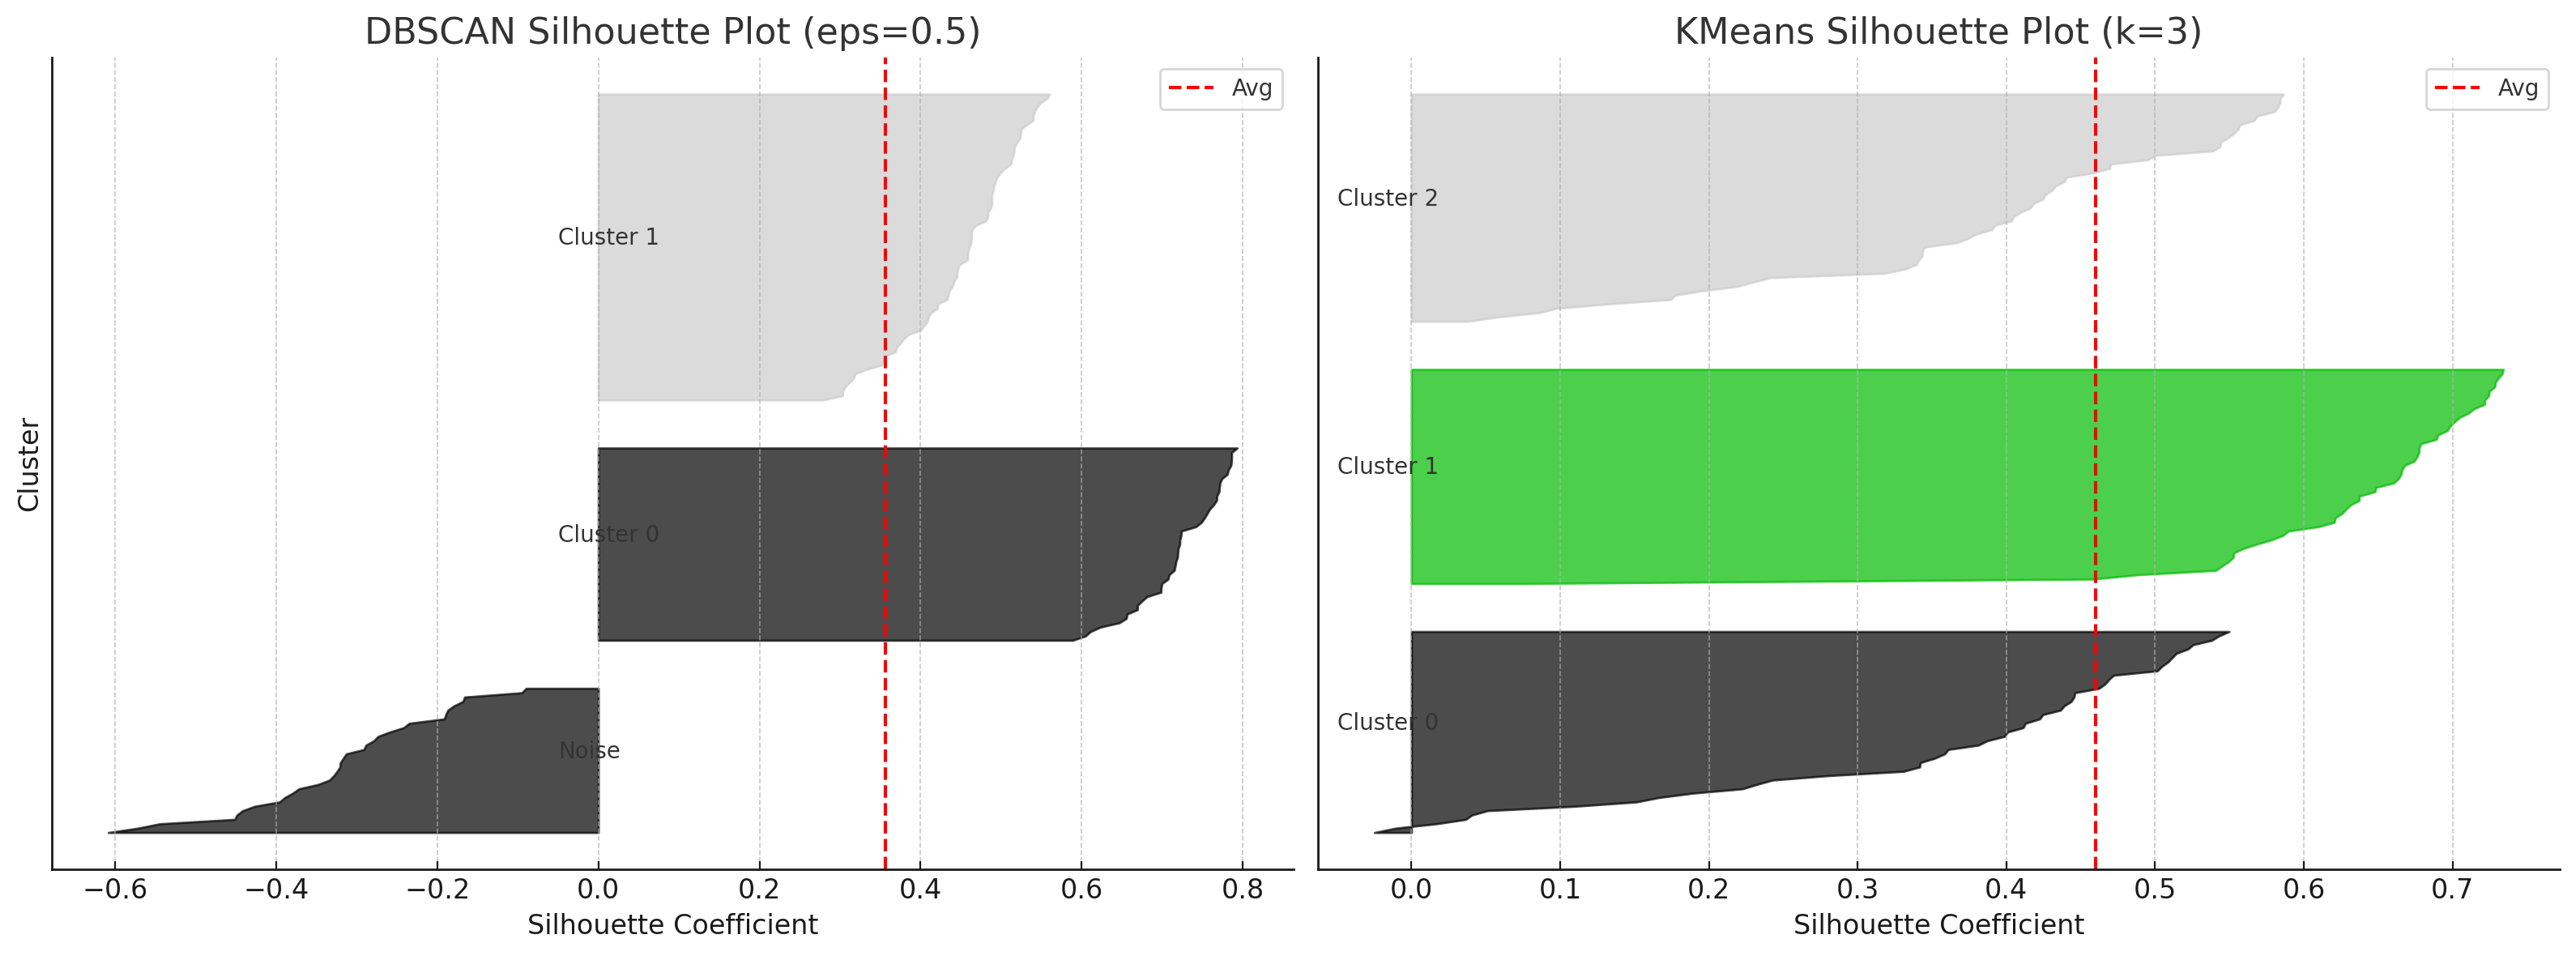

In [35]:
Image("../../Images/Silhoutte Plot Comparison.png")

<h3 style = 'color:green'>4.4 Hierarchical Clustering</h3>

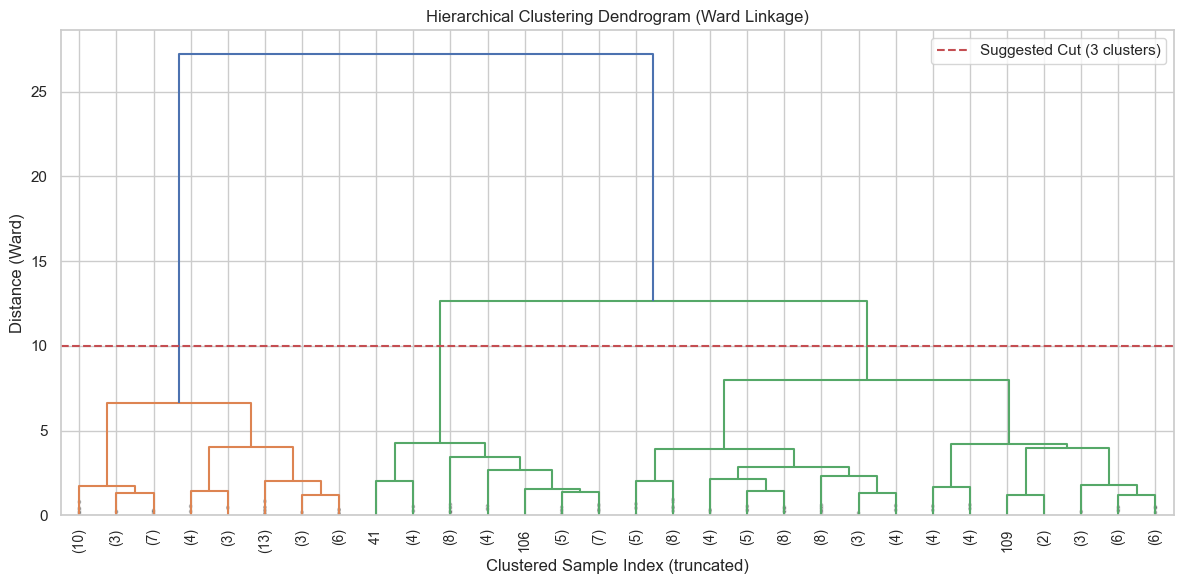

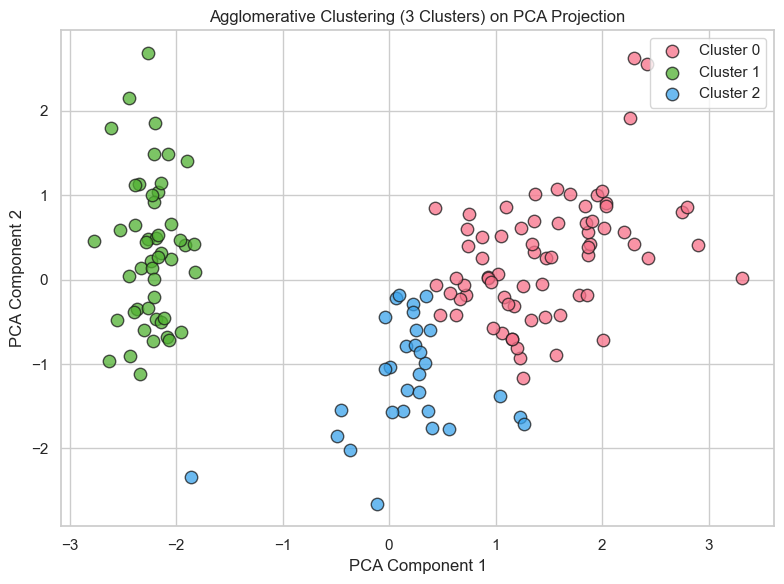

In [36]:
# Step 1: Dendrogram using complete linkage
linkage_matrix = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Clustered Sample Index (truncated)")
plt.ylabel("Distance (Ward)")
plt.axhline(y=10, color='r', linestyle='--', label='Suggested Cut (3 clusters)')
plt.legend()
plt.tight_layout()
plt.show()

# Step 2: Agglomerative clustering (cut dendrogram at n_clusters=3)
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Step 3: PCA projection for visualization
plt.figure(figsize=(8, 6))
palette = sns.color_palette("husl", 3)
for i in range(3):
    plt.scatter(X_pca[agglo_labels == i, 0], X_pca[agglo_labels == i, 1],
                label=f'Cluster {i}', s=80, edgecolor='k', alpha=0.75, c=[palette[i]])

plt.title("Agglomerative Clustering (3 Clusters) on PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

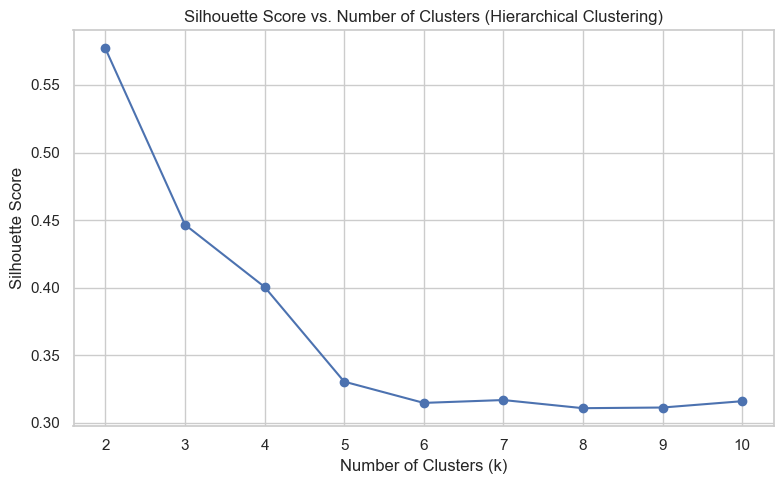

In [37]:
# Evaluate Agglomerative Clustering for k = 2 to 10 using silhouette score
k_values = list(range(2, 11))
silhouette_scores = []

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels_k = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_k)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (Hierarchical Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

<h3 style = 'color:green'>4.5 Spectral Clustering</h3>

<h4 style = 'color:lightgreen'>4.5.1 Kernel = kMeans</h4>

In [38]:
def compute_spectral_clustering(kernel, n_clusters):
    # Run Spectral Clustering with 3 clusters
    spectral = SpectralClustering(n_clusters=n_clusters, affinity=kernel, assign_labels='kmeans', random_state=42)
    spectral_labels = spectral.fit_predict(X_scaled) # Fit the model and predict cluster labels

    # Reduce data to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot the results
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("husl", 3)
    for i in range(3):
        plt.scatter(X_pca[spectral_labels == i, 0], X_pca[spectral_labels == i, 1],
                    label=f'Cluster {i}', s=80, edgecolor='k', alpha=0.75, c=[palette[i]])

    plt.title("Spectral Clustering (3 Clusters) on PCA Projection")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return spectral_labels

In [39]:
def plot_silhoutte(kernel, n_clusters, spectral_labels=None):
    # Compute silhouette score and values for Spectral Clustering
    spectral_sil_score = silhouette_score(X_scaled, spectral_labels)
    spectral_sil_vals = silhouette_samples(X_scaled, spectral_labels)

    # Prepare the silhouette plot
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10
    unique_labels = np.unique(spectral_labels)

    for label in unique_labels:
        cluster_vals = spectral_sil_vals[spectral_labels == label]
        cluster_vals.sort()
        size = cluster_vals.shape[0]
        y_upper = y_lower + size
        color = plt.cm.nipy_spectral(float(label) / len(unique_labels))

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals,
                        facecolor=color, edgecolor=color, alpha=0.7, label=f"Cluster {label}")
        ax.text(-0.05, y_lower + 0.5 * size, f"Cluster {label}")
        y_lower = y_upper + 10

    # Plot average silhouette score line
    ax.axvline(spectral_sil_score, color="red", linestyle="--", label=f"Avg Score = {spectral_sil_score:.4f}")

    # Final formatting
    ax.set_title("Silhouette Plot for Spectral Clustering (k=3)")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.legend()
    ax.set_yticks([])
    ax.set_xticks(np.linspace(-0.1, 1.0, 12))
    plt.tight_layout()
    plt.show()

    print(f"Spectral Clustering Silhouette Score: {spectral_sil_score:.4f}")

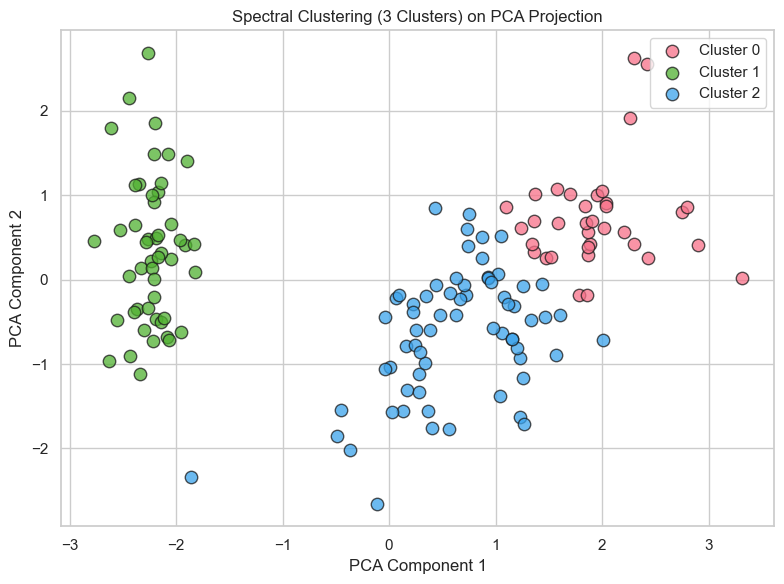

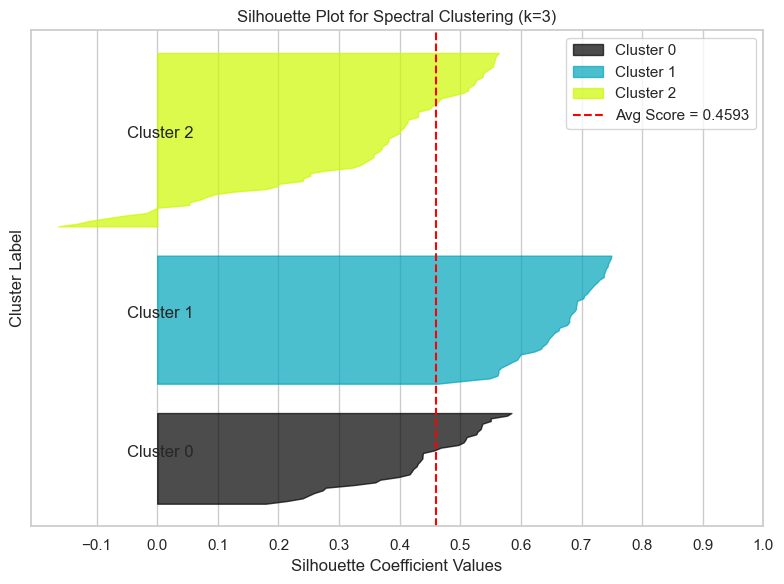

Spectral Clustering Silhouette Score: 0.4593


In [40]:
kernel = "nearest_neighbors"
n_clusters = 3
spectral_labels = compute_spectral_clustering(kernel, n_clusters)
plot_silhoutte(kernel, n_clusters, spectral_labels)

<h4 style = 'color:lightgreen'>4.5.2 Kernel = Gaussian / Radial Basis Function</h4>

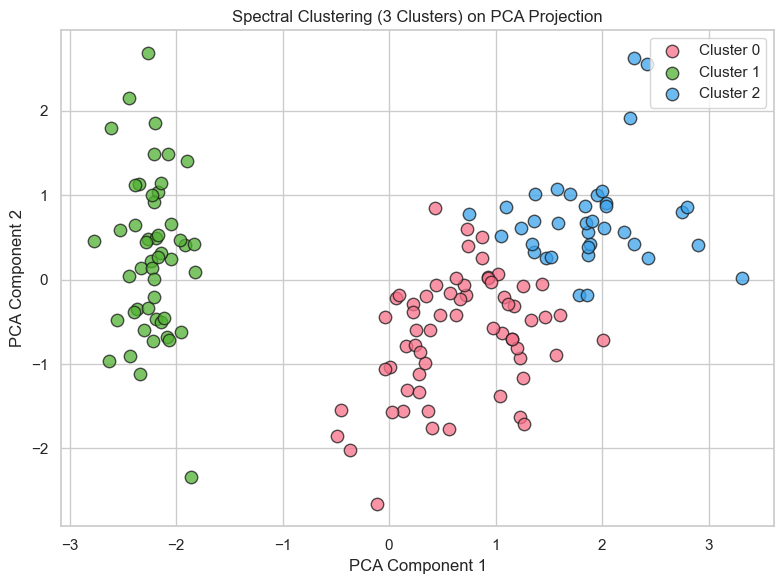

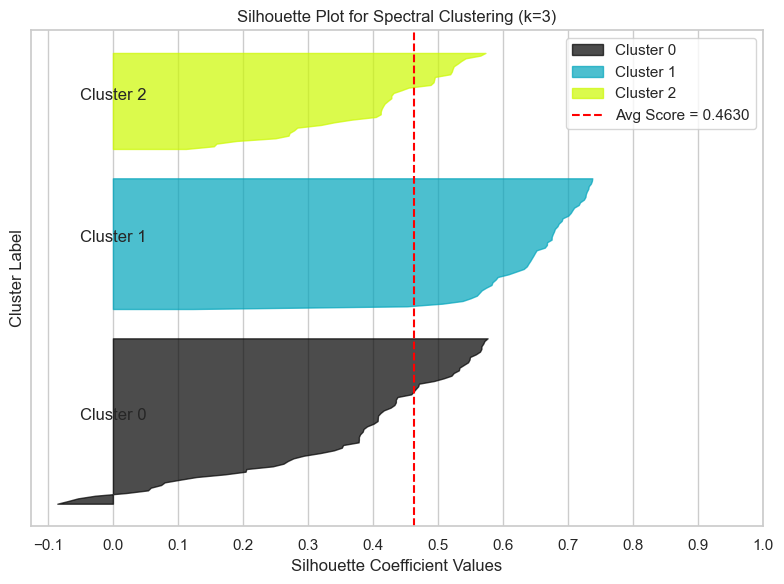

Spectral Clustering Silhouette Score: 0.4630


In [41]:
kernel = "rbf"
n_clusters = 3
spectral_labels = compute_spectral_clustering(kernel, n_clusters)
plot_silhoutte(kernel, n_clusters, spectral_labels)